In [1]:
import numpy as np
data = np.load('2D_1000.npz')
print(data.files)

['Efavg_30000']


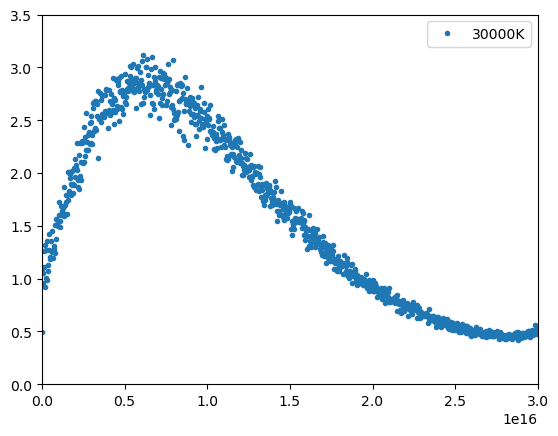

In [3]:
import matplotlib.pyplot as plt
Es = data['Efavg_30000']
freqs = np.linspace(0,30e15,1000)
plt.plot(freqs,Es,'.',label='30000K')
plt.xlim(0,3e16)
plt.ylim(0,3.5)
plt.legend()


#plt.xlabel('time')
#plt.ylabel('Electric field source Es')
plt.savefig('2D_500.png')

In [7]:
#setup some constants and parameters
M=2**21 #模擬步數
tsim=7e-12 #模擬長度
eps0 = 8.854187e-12 
hbar = 1.05457182e-34
c = 2.99792458e8
kb = 1.380649e-23
hdk=7.63823258e-12 # hbar/kb
T=30000
deltap = np.sqrt(1/3/eps0/hbar/c)*kb*T #小delta 

In [8]:
def D(omega,T):
    return(4*hbar*omega**2/c**2/(np.exp(hdk*omega/T)-1))

/tmp/ipykernel_6517/2100052625.py:2: RuntimeWarning: invalid value encountered in divide
  return(4*hbar*omega**2/c**2/(np.exp(hdk*omega/T)-1))


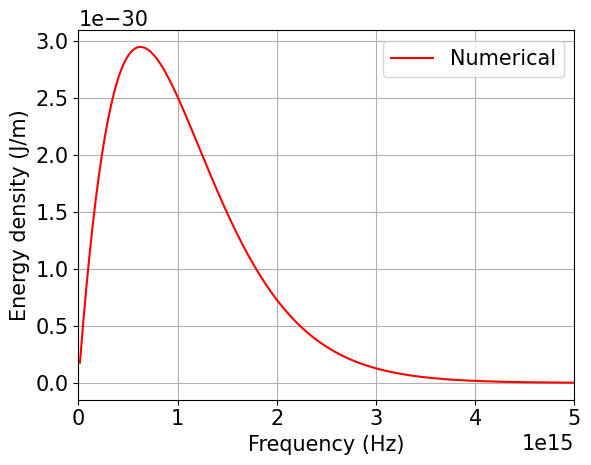

In [17]:
limit=1000
frequency_limit = np.linspace(0, 25, limit)
frequency = frequency_limit*10**14
omega = frequency*np.pi*2
plt.rcParams.update({'font.size': 15})
plt.xlim(0,5e15)
#plt.ylim(0,3.5*1e-28)
#plt.plot(freqs,Es*1e-28,'.',label='simulation')
plt.plot(omega,D(omega,3000)*2e19*np.pi*1e-28,'red',label='Numerical')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Energy density (J/m)')
plt.grid()
plt.savefig('116.png')

In [24]:
from PIL import Image

def transPNG(srcImageName, dstImageName):
    img = Image.open(srcImageName)
    img = img.convert("RGBA")
    datas = img.getdata()
    newData = list()
    for item in datas:
        if item[0] > 225 and item[1] > 225 and item[2] > 225:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
    img.putdata(newData)
    img.save(dstImageName, "PNG")
transPNG('1.png','new1.png')